# Ejercicio 1

## a.

En primer lugar necesitamos importar las dependencias necesarias, las cuales son

In [32]:
from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage,AnnotationBbox
import pandas as pd
import json

Luego inicializamos la clases *factory* la cual se utilizara para crear a cada pokemon e inicializar el array *pokeballs* que contendra el nombre de cada pokebola

In [33]:
factory = PokemonFactory("pokemon.json")
pokeballs = ["pokeball", "ultraball", "fastball", "heavyball"]    

La función *get_image* toma como entrada el nombre de una pokeball y devuelve una imagen de la pokebola. La imagen se lee del archivo de imagen correspondiente.

In [34]:
def get_image(name):
    path = f"img/{name}.png"
    im = plt.imread(path)
    return im

La función *offset_image* toma como entrada la coordenada de la barra, el nombre del país y el objeto de ejes de la figura. Esta función crea una imagen de la bandera utilizando la función get_flag y crea un objeto OffsetImage que se utiliza para agregar la imagen en la posición correcta en el gráfico de barras. La imagen se ajusta a un tamaño determinado utilizando el parámetro zoom. La función AnnotationBbox se utiliza para crear un objeto de anotación que se ajusta a la barra y contiene la imagen de la bandera. La ubicación de la caja de anotación se especifica mediante *xybox*, *xycoords* y *boxcoords*. Finalmente, se agrega el objeto de anotación al eje de la figura utilizando la función *ax.add_artist*.

In [35]:
def offset_image(coord, name, ax):
    img = get_image(name)
    im = OffsetImage(img, zoom=0.05)
    im.image.axes = ax

    ab = AnnotationBbox(im, (coord, 0),  xybox=(0., -16.), frameon=False,
                        xycoords='data',  boxcoords="offset points", pad=0)

    ax.add_artist(ab)

Luego debemos instanciar las clases y crear los datos

In [36]:
poke = []
with open("pokemon.json", "r") as c:
            pokemon_db = json.load(c)
        
for pokemon in pokemon_db:
    poke.append(factory.create(pokemon, 100, StatusEffect.NONE, 1))

En el siguiente codigo se realiza, con todas las pokebolas,  100 intentos de atrapar a cada pokemon y finalmente se muestra el grafico de los porcentajes de atrapadas en funcion del tipo de pokebola.

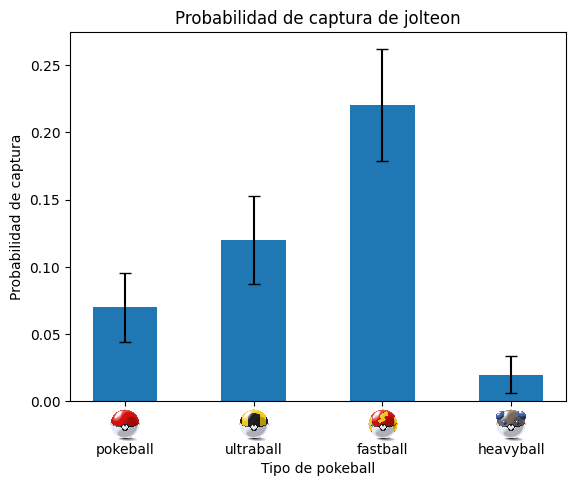

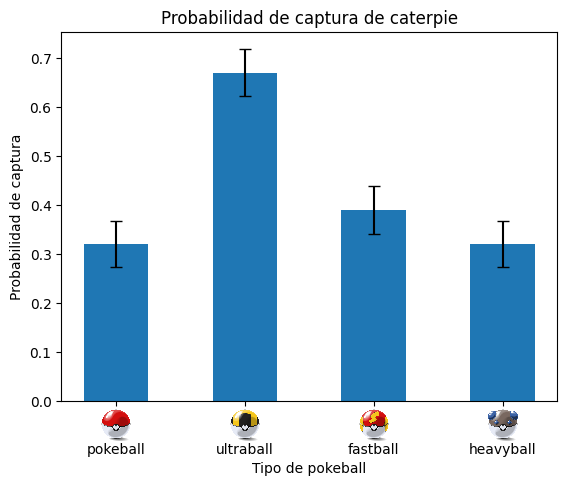

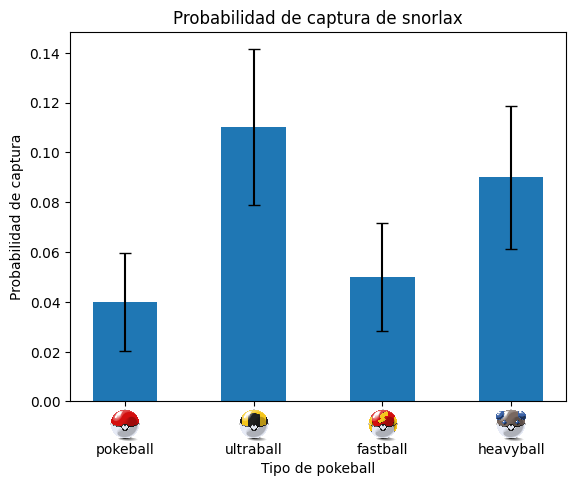

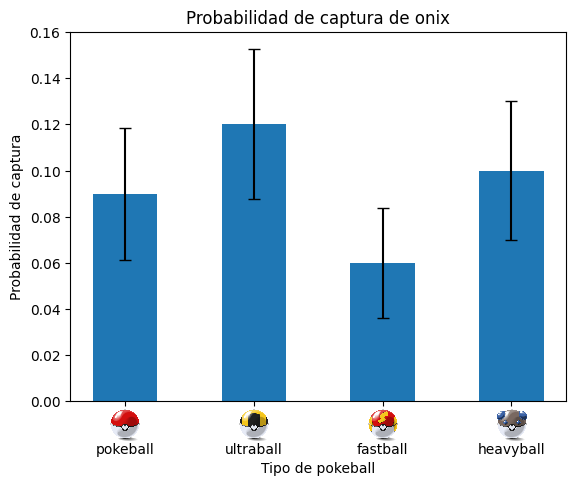

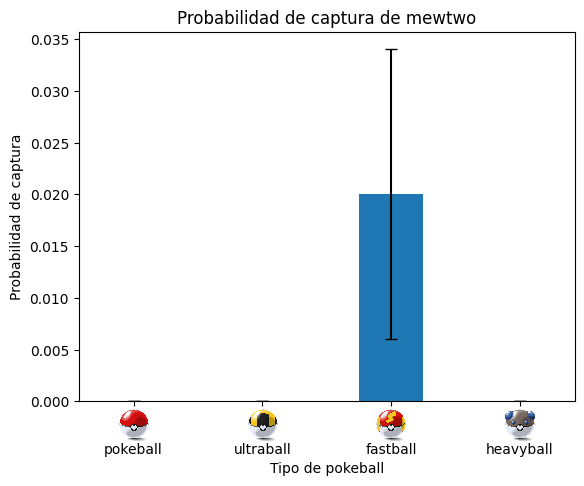

In [37]:
for poke_instance in poke:
    capture_rates = []
    std_errors = []
    for pokeball_type in pokeballs:
        capture_attempts = []
        for i in range(100):
            capture_attempts.append(attempt_catch(poke_instance, pokeball_type)[0])

        capture_rate = sum(capture_attempts) / len(capture_attempts)
        capture_rates.append(capture_rate)
        std_error = np.std(capture_attempts) / np.sqrt(len(capture_attempts))
        std_errors.append(std_error)
        
    fig, ax = plt.subplots()

    ax.bar(range(len(pokeballs)), capture_rates, yerr=std_errors, capsize=4, width=0.5,align="center")
    ax.set_xticks(range(len(pokeballs)))
    ax.set_xticklabels(pokeballs)
    ax.tick_params(axis='x', which='major', pad=26)
    
    plt.title(f'Probabilidad de captura de {poke_instance.name}')
    plt.xlabel('Tipo de pokeball')
    plt.ylabel('Probabilidad de captura')

    for i, c in enumerate(pokeballs):
        offset_image(i, c, ax)
    plt.show()

## b.

Efectivamente, dadas ciertas propiedades intrinsecas de cada pokemon la propiedad de atraparlos se ve modificada. Por ejemplo, Jolteon tiene 130 en su estadistica de velocidad; por lo que observando el grafico, la probabilidad de atraparlo con la fastball en la mayoria de casos sera razonablemente superior comparado a las otras pokeballs. Esto se debe a que la pokebola fastball incrementa la posibilidad de atrapar a partir de 100 de estadistica.